## Installing required libraries

In [ ]:
!pip install numpy panda matplotlib scikit-learn seaborn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target


# print(x)
# print(y)
# print(len(x))


In [3]:
# Convert to DataFrame 

df = pd.DataFrame(X, columns=iris.feature_names)
print(df)

# Adding a column
df['target'] = y

df


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df.shape


(150, 5)

In [5]:
from sklearn.model_selection import train_test_split


# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)




In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Try different k values (first 6 - gives 100%)

knn = KNeighborsClassifier(n_neighbors = 7) 

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [62]:
knn.score(X_test, y_test)


0.9666666666666667

In [63]:
# Directory to save models
model_dir = 'models/'
os.makedirs(model_dir, exist_ok=True)  # Ensure the directory exists

# Save the KNN model
knn_model_path = os.path.join(model_dir, 'KNN.joblib')
joblib.dump(knn, knn_model_path)
print(f"KNN model saved to {knn_model_path}")


KNN model saved to models/KNN.joblib


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = knn.predict(X_test)

# Evaluating model

print("KNN Results\n")

print("Accuracy", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


KNN Results

Accuracy 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Precision: 0.9694444444444444
F1 Score: 0.9664109121909632


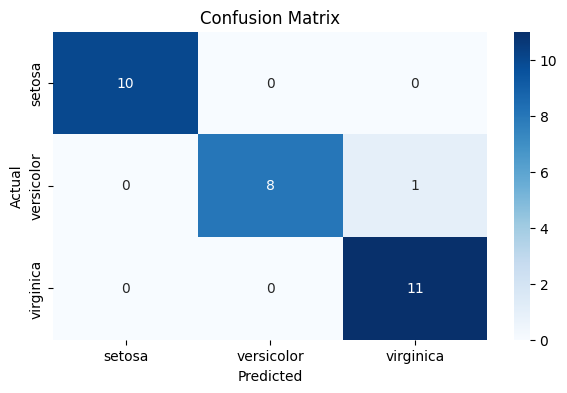

In [36]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

class_names = ['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


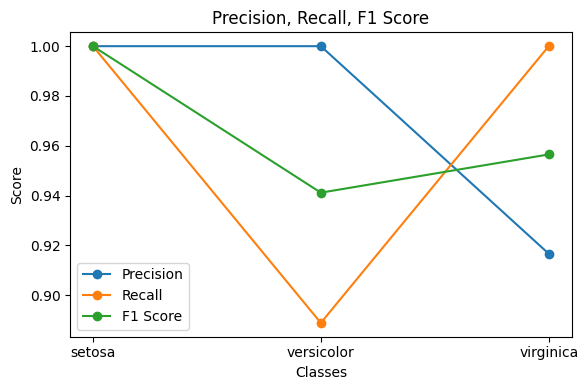

In [41]:
plt.figure(figsize=(6, 4))

metrics = [precision, recall, f1]
metric_names = ['Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics):
    plt.plot(range(len(class_names)), metric, marker='o', label=metric_names[i])

plt.xticks(ticks=range(len(class_names)), labels=class_names)
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score')
plt.legend()
plt.tight_layout()

plt.show()


In [55]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Initialize classifiers
classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(),
    'SGD': SGDClassifier()
}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = {
        'y_pred': y_pred,
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }
    print(f"\n{name} Results")
    print("Accuracy:", results[name]['accuracy'])
    print("Confusion Matrix:\n", results[name]['confusion_matrix'])
    print("Classification Report:\n", results[name]['classification_report'])
    print("Recall:", results[name]['recall'])
    print("Precision:", results[name]['precision'])
    print("F1 Score:", results[name]['f1_score'])



SVM Results
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Recall: 1.0
Precision: 1.0
F1 Score: 1.0

Logistic Regression Results
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.0

c:\Users\hasee\anaconda3\envs\py311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
import joblib

# Directory to save models
model_dir = 'Models/'

# Ensure the directory exists
import os
os.makedirs(model_dir, exist_ok=True)

# Save each classifier model
for name, clf in classifiers.items():
    model_path = os.path.join(model_dir, f'{name}.joblib')
    joblib.dump(clf, model_path)
    print(f"Model {name} saved to {model_path}")


Model SVM saved to Models/SVM.joblib
Model Logistic Regression saved to Models/Logistic Regression.joblib
Model Random Forest saved to Models/Random Forest.joblib
Model MLP saved to Models/MLP.joblib
Model SGD saved to Models/SGD.joblib


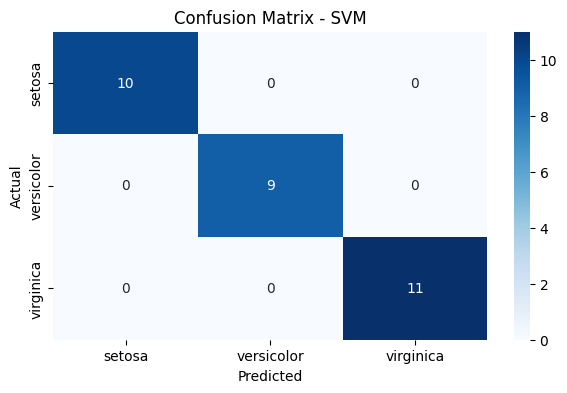

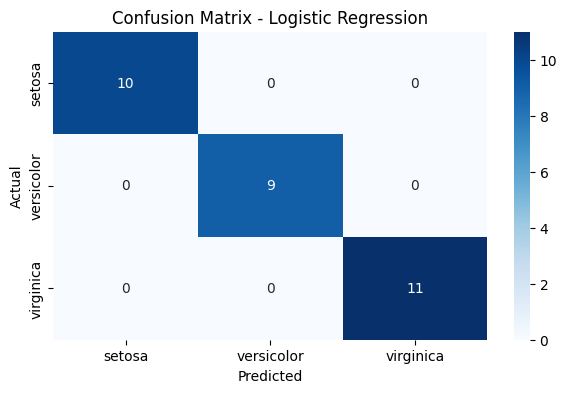

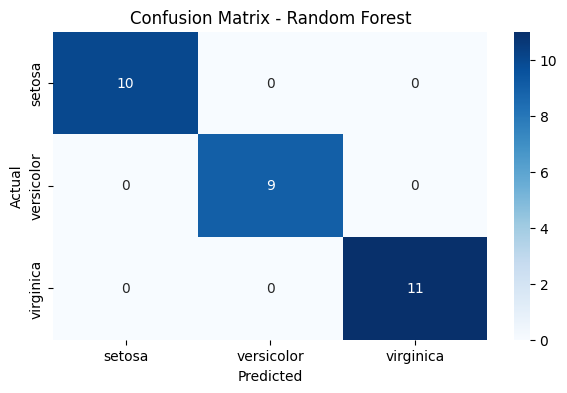

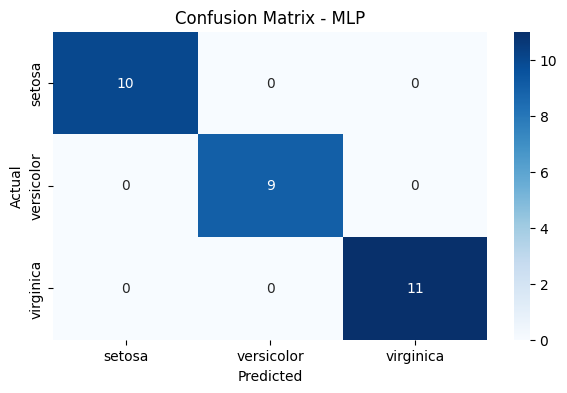

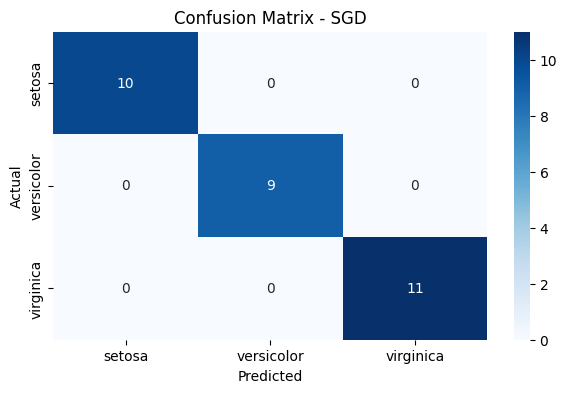

In [44]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(7, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

for name in results:
    cm = results[name]['confusion_matrix']
    plot_confusion_matrix(cm, name)


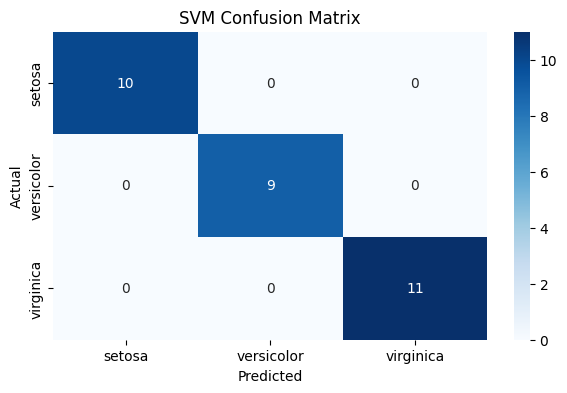

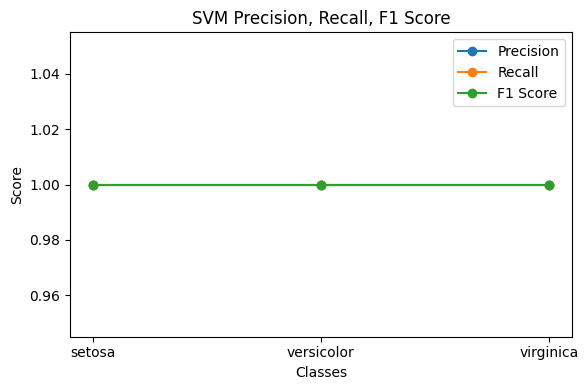

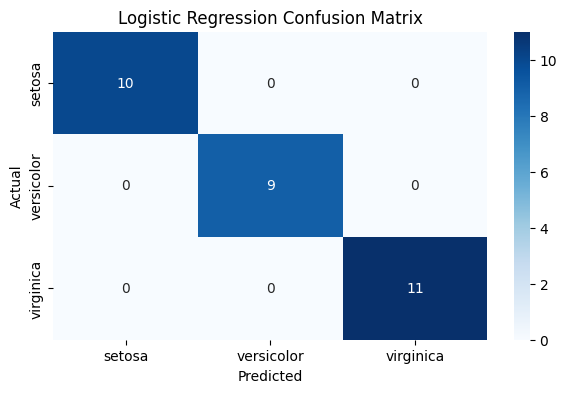

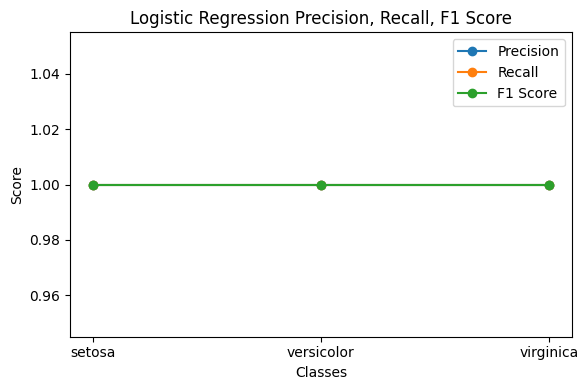

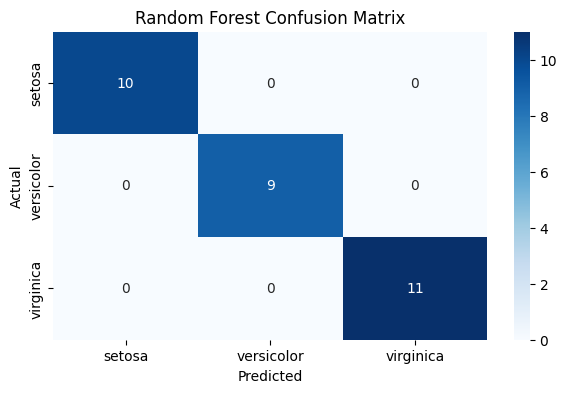

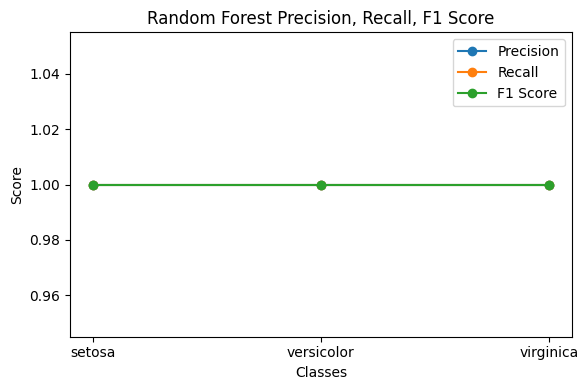

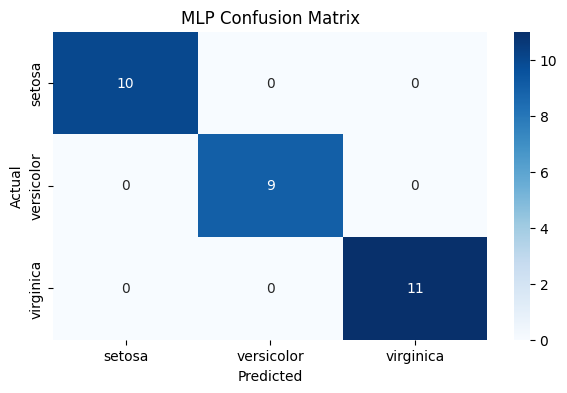

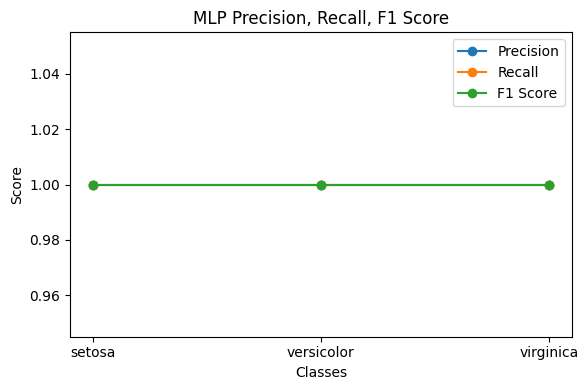

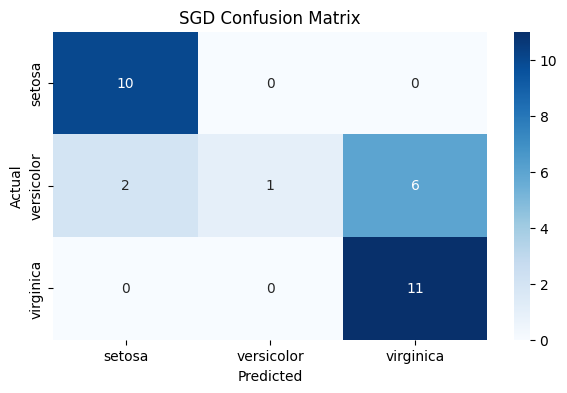

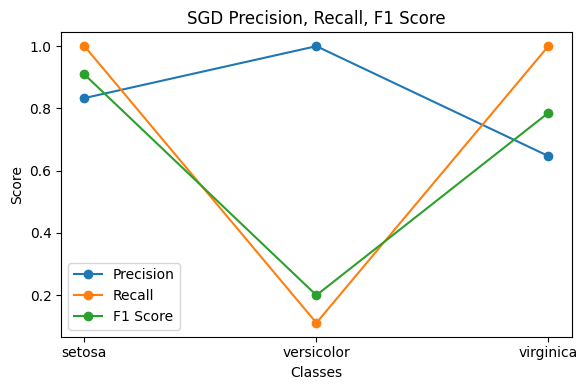

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, class_names, title):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to plot precision, recall, and F1-score
def plot_metrics(y_test, y_pred, class_names, title):
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    metrics = [precision, recall, f1]
    metric_names = ['Precision', 'Recall', 'F1 Score']

    plt.figure(figsize=(6, 4))

    for i, metric in enumerate(metrics):
        plt.plot(range(len(class_names)), metric, marker='o', label=metric_names[i])

    plt.xticks(ticks=range(len(class_names)), labels=class_names)
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Class names for Iris dataset
class_names = ['setosa', 'versicolor', 'virginica']

# Plotting the results for each classifier
for name, result in results.items():
    y_pred = result['y_pred']
    plot_confusion_matrix(y_test, y_pred, class_names, f'{name} Confusion Matrix')
    plot_metrics(y_test, y_pred, class_names, f'{name} Precision, Recall, F1 Score')


In [3]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Save to CSV
df.to_csv('iris_dataset.csv', index=False)

# Save to Excel
df.to_excel('iris_dataset.xlsx', index=False)
